### 1-day rain plots

Plots daily rainfall over 5 days of the East Coast Low AUS2200 simulation.

In [22]:
from dask.distributed import Client
from glob import glob
import xarray as xr
import pandas

In [14]:
flist=sorted(glob('/g/data/v45/cc6171/experiments/ECL-2016_smallshift/netcdf/u-cs142/2016060*T*Z/aus2200/d0198/RA3/um/umnsa_spec_*.nc'))

In [15]:
client=Client()

/g/data/hh5/public/apps/cms_conda/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37389 instead
  warnings.warn(


Modifying workers


/g/data/hh5/public/apps/dask-optimiser/schedplugin.py:160: UserWarning: Attempted illegal binding: []
  warn(f"Attempted illegal binding: {(sorted(list(self.slots_available - taken_slots))[:self.worker.state.nthreads])}")
/g/data/hh5/public/apps/dask-optimiser/schedplugin.py:160: UserWarning: Attempted illegal binding: []
  warn(f"Attempted illegal binding: {(sorted(list(self.slots_available - taken_slots))[:self.worker.state.nthreads])}")
/g/data/hh5/public/apps/dask-optimiser/schedplugin.py:160: UserWarning: Attempted illegal binding: []
  warn(f"Attempted illegal binding: {(sorted(list(self.slots_available - taken_slots))[:self.worker.state.nthreads])}")
/g/data/hh5/public/apps/dask-optimiser/schedplugin.py:160: UserWarning: Attempted illegal binding: []
  warn(f"Attempted illegal binding: {(sorted(list(self.slots_available - taken_slots))[:self.worker.state.nthreads])}")


In [16]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-spr-0218.gadi.nci.org.au/13627/proxy/37389/status,
Dashboard: /node/gadi-cpu-spr-0218.gadi.nci.org.au/13627/proxy/37389/status,Workers: 4
Total threads: 4,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42913,Workers: 4
Dashboard: /node/gadi-cpu-spr-0218.gadi.nci.org.au/13627/proxy/37389/status,Total threads: 4
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:41847,Total threads: 1
Dashboard: /node/gadi-cpu-spr-0218.gadi.nci.org.au/13627/proxy/33621/status,Memory: 0 B
Nanny: tcp://127.0.0.1:40577,


In [33]:
ds = xr.open_mfdataset(flist,parallel=True,preprocess=lambda x: x['fld_s04i201'] + x['fld_s04i202'])

In [36]:
ds

<xarray.DataArray (time_0: 720, lat: 2120, lon: 2600)> Size: 16GB
dask.array<concatenate, shape=(720, 2120, 2600), dtype=float32, chunksize=(2, 1060, 1300), chunktype=numpy.ndarray>
Coordinates:
  * lat                       (lat) float64 17kB -48.79 -48.77 ... -6.852 -6.832
  * lon                       (lon) float64 21kB 114.3 114.3 ... 165.7 165.7
    theta_level_height        float64 8B 5.0
    model_theta_level_number  int32 4B 1
    sigma_theta               float64 8B 0.9994
    height                    float64 8B 10.0
    height_0                  float64 8B 1.5
  * time_0                    (time_0) datetime64[ns] 6kB 2016-06-03T00:05:00...

In [34]:
da_fin=ds.resample(time_0='1D',offset='9h').sum()

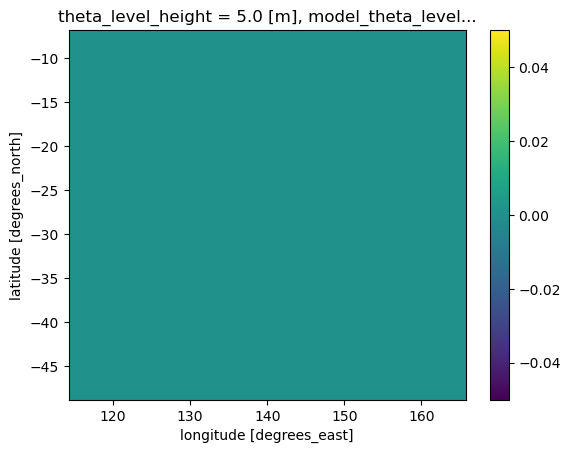

In [35]:
(ds.sel(time_0=slice(pandas.Timestamp('2016-06-03T09:00:00'),pandas.Timestamp('2016-06-04T09:00:00'))).sum(dim='time_0') - da_fin[1]).plot()

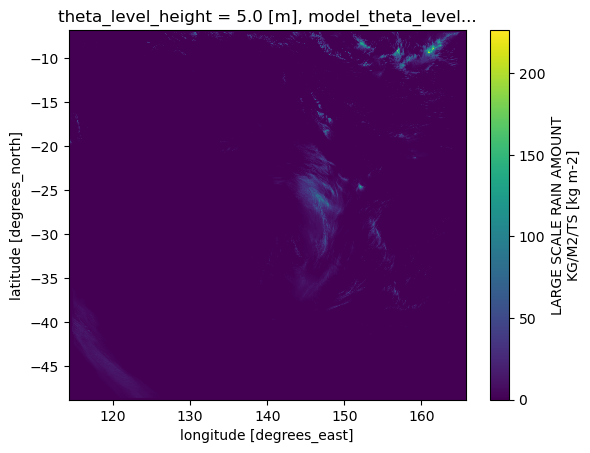

In [7]:
da_fin[0].plot()

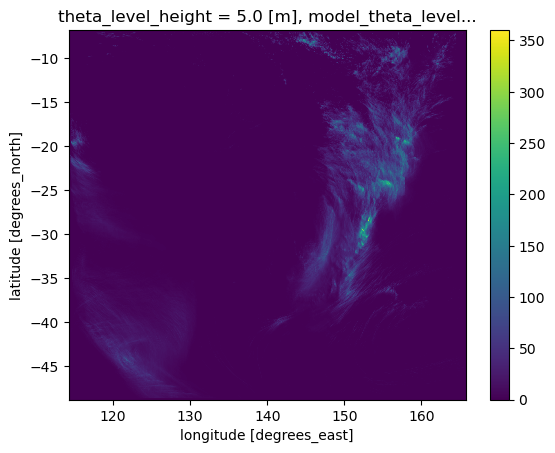

In [32]:
da_fin[1].plot()

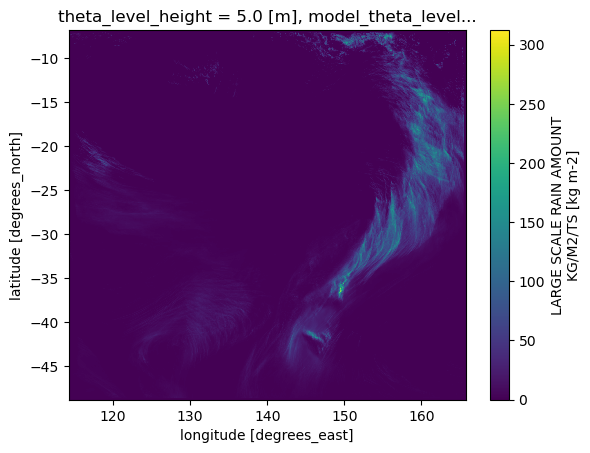

In [9]:
da_fin[2].plot()

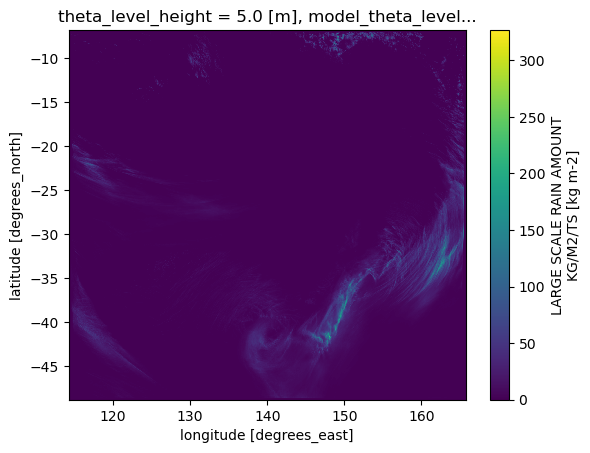

In [10]:
da_fin[3].plot()

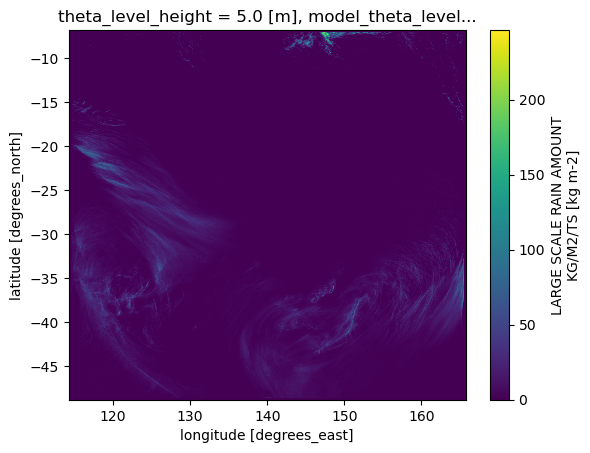

In [11]:
da_fin[4].plot()

In [23]:
da_fin

<xarray.DataArray (time_0: 6, lat: 2120, lon: 2600)> Size: 132MB
dask.array<transpose, shape=(6, 2120, 2600), dtype=float32, chunksize=(1, 1060, 1300), chunktype=numpy.ndarray>
Coordinates:
  * lat                       (lat) float64 17kB -48.79 -48.77 ... -6.852 -6.832
  * lon                       (lon) float64 21kB 114.3 114.3 ... 165.7 165.7
    theta_level_height        float64 8B 5.0
    model_theta_level_number  int32 4B 1
    sigma_theta               float64 8B 0.9994
    height                    float64 8B 10.0
    height_0                  float64 8B 1.5
  * time_0                    (time_0) datetime64[ns] 48B 2016-06-02T09:00:00...